<a href="https://colab.research.google.com/github/selimunal/tensorflow/blob/main/3_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Conv2D

In [ ]:
from  tensorflow.keras.models import Sequential,Model

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
type(fashion_mnist)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
x_train,x_test=x_train/255,x_test/255
print("x_train shape",x_train.shape)

x_train shape (60000, 28, 28)


In [ ]:
x_train.max()

1.0

In [ ]:
K=len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
x_train.shape[1:]#you need to get 1 more dimension

(28, 28)

In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#BUILD THE MODEL

i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3, 3),strides=2,activation="relu")(i)
x=Conv2D(64,(3, 3),strides=2,activation="relu")(x)
x=Conv2D(128,(3, 3),strides=2,activation="relu")(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K,activation="softmax")(x)

model=Model(i,x)



In [ ]:
#COMPILE AND FIT THE MODEL
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#FIT THE MODEL

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

NameError: ignored

In [ ]:
#PLOT LOSS PER ITERATION
import matplotlib.pyplot as plt
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

NameError: ignored

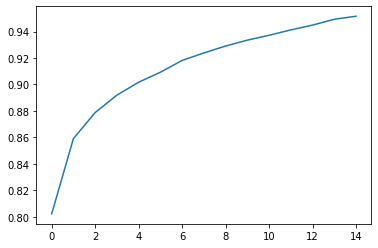

In [ ]:
#PLOT THE ACCURACY PER ITERATION
plt.plot(r.history["accuracy"],label="acc")
plot.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()

confusion matrix without normalization
[[861   3  29  14   7   2  79   0   5   0]
 [  4 976   0  13   3   0   2   0   2   0]
 [ 15   1 841  11  63   0  69   0   0   0]
 [ 15   3  18 908  33   0  23   0   0   0]
 [  1   0  47  23 863   0  65   0   1   0]
 [  0   0   0   2   0 975   0  15   0   8]
 [120   1  78  24 107   0 661   0   8   1]
 [  0   0   0   0   0  18   0 964   0  18]
 [  0   1   5   2  11   2   8   2 968   1]
 [  0   0   0   0   0   5   1  37   0 957]]


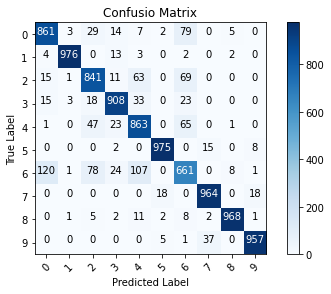

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="Confusio Matrix",
                          cmap=plt.cm.Blues):
  #This prints and plots the condusion matrix. normalization
  #can be applied by setting normalize=True

  if normalize:

    cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:
    print("confusion matrix without normalization")

  print(cm)

  plt.imshow(cm,interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt=".2f" if normalize else "d"
  thresh=cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels= '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Amkel boot'''.split()

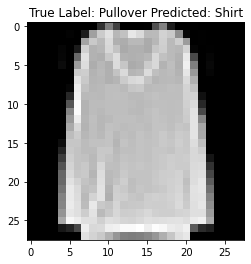

In [ ]:
#SHOW MISCLASSIFIED EXAMPLES
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap="gray")
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));